In [14]:
from __future__ import division, print_function

# Third-party
import matplotlib as mpl
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

# Custom
import biff

First, define a function to compute the density. In this case I'll use a flattened Hernquist profile. `M` is the mass, `a` the scale radius, and `q` the flattening:

In [2]:
def flattened_hernquist_density(x, y, z, M, a, q):
    s = np.sqrt(x*x + y*y + z*z/(q*q))
    return M*a / (2*np.pi) / (s * (a + s)**3)

Next I'll define the grid of `nlm` values to compute coefficients for. Because it's axisymmetric, we can ignore $m > 0$ terms and odd $l$ terms:

In [3]:
nmax = 8
lmax = 8

In [4]:
nlm = np.mgrid[0:nmax+1, 0:lmax+1:2, 0:1]
nlm = nlm.reshape(3,-1)
nlm = nlm.T
nlm

array([[0, 0, 0],
       [0, 2, 0],
       [0, 4, 0],
       [0, 6, 0],
       [0, 8, 0],
       [1, 0, 0],
       [1, 2, 0],
       [1, 4, 0],
       [1, 6, 0],
       [1, 8, 0],
       [2, 0, 0],
       [2, 2, 0],
       [2, 4, 0],
       [2, 6, 0],
       [2, 8, 0],
       [3, 0, 0],
       [3, 2, 0],
       [3, 4, 0],
       [3, 6, 0],
       [3, 8, 0],
       [4, 0, 0],
       [4, 2, 0],
       [4, 4, 0],
       [4, 6, 0],
       [4, 8, 0],
       [5, 0, 0],
       [5, 2, 0],
       [5, 4, 0],
       [5, 6, 0],
       [5, 8, 0],
       [6, 0, 0],
       [6, 2, 0],
       [6, 4, 0],
       [6, 6, 0],
       [6, 8, 0],
       [7, 0, 0],
       [7, 2, 0],
       [7, 4, 0],
       [7, 6, 0],
       [7, 8, 0],
       [8, 0, 0],
       [8, 2, 0],
       [8, 4, 0],
       [8, 6, 0],
       [8, 8, 0]])

The above is just some fancy numpy array manipulation to create a meshgrid of $n$,$l$,$m$ values (stored in the variable `nlm`).

For this example, I'll just set $M=1$, $a=1$, $q=0.9$:

In [5]:
M = 1.
a = 1.
q = 0.9

(S,Serr),(T,Terr) = biff.compute_coeffs(flattened_hernquist_density,
                                        nlm=nlm,
                                        M=M, r_s=a,
                                        args=(M,a,q))

In [8]:
S

array([  9.15236678e-01,  -9.45006215e-02,   3.07836038e-02,
        -1.35124207e-02,   6.86633756e-03,  -5.20549907e-03,
        -4.68474434e-03,   1.92582600e-03,  -8.69087028e-04,
         4.29817260e-04,   6.49917895e-05,  -2.49084217e-03,
         8.28944026e-04,  -3.31529024e-04,   1.50630972e-04,
        -1.04066454e-06,  -3.25810379e-04,   1.28304731e-04,
        -5.20844108e-05,   2.30392062e-05,   1.88636254e-08,
        -2.27610769e-04,   6.61721318e-05,  -2.31164679e-05,
         9.26268041e-06,  -3.68365652e-10,  -4.34623584e-05,
         1.47151457e-05,  -5.18833692e-06,   2.02331707e-06,
         7.55988089e-12,  -3.59941256e-05,   8.63059008e-06,
        -2.57877440e-06,   9.03746500e-07,  -1.60763242e-13,
        -8.51644793e-06,   2.37485291e-06,  -7.15102284e-07,
         2.43968624e-07,   3.51064663e-15,  -7.92916716e-06,
         1.53441359e-06,  -3.88338066e-07,   1.18523387e-07])

In [9]:
T

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

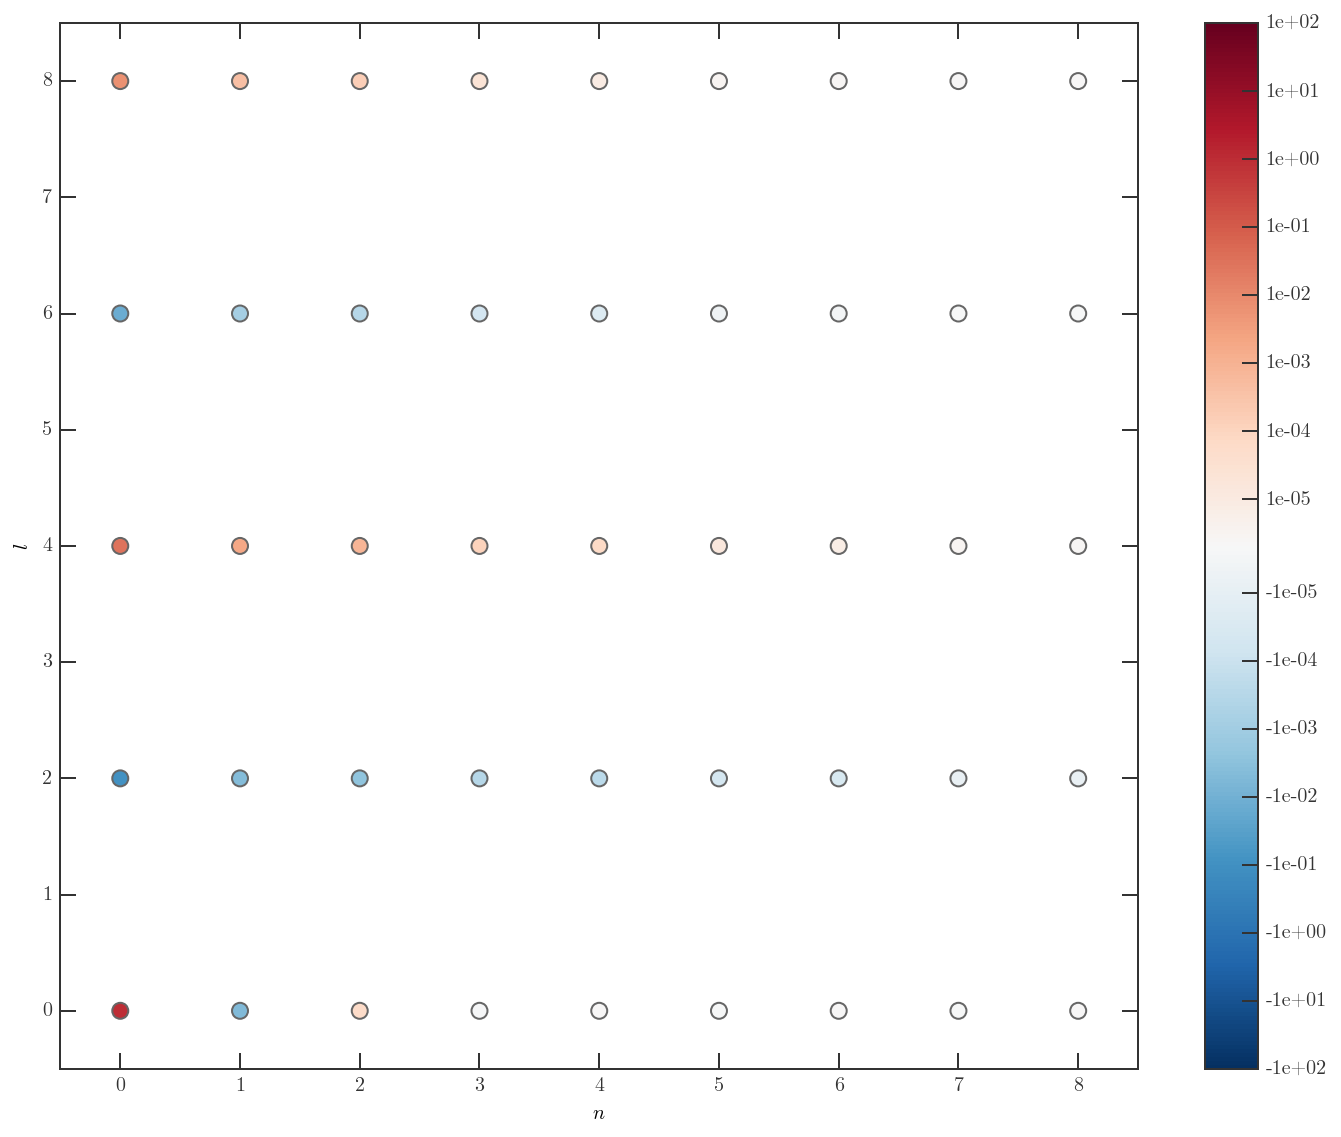

In [15]:
# coefficients
fig,ax = pl.subplots(1,1,figsize=(10,8))

n,l,_ = nlm.T
c = ax.scatter(n.ravel(), l.ravel(), c=S, s=64,
               norm=mpl.colors.SymLogNorm(1E-5), cmap='RdBu_r',
               vmin=-100, vmax=100, linewidths=1., edgecolors='#666666')

ax.xaxis.set_ticks(np.arange(0,nmax+1,1))
ax.yaxis.set_ticks(np.arange(0,lmax+1,1))

ax.set_xlim(-0.5, nmax+0.5)
ax.set_ylim(-0.5, lmax+0.5)

ax.set_xlabel('$n$')
ax.set_ylabel('$l$')

tickloc = np.concatenate((-10.**np.arange(2,-5-1,-1),
                          10.**np.arange(-5,2+1,1)))
fig.colorbar(c, ticks=tickloc, format='%.0e')
fig.tight_layout()